In [2]:
#### import random

import numpy             as np
import matplotlib.pyplot as plt
import matplotlib        as mpl
import matplotlib.ticker as tck
import matplotlib.ticker as ticker

from scipy.linalg    import eig
from scipy.linalg    import eigh

from numpy.linalg import det
from numpy.linalg import inv
import matplotlib.colors as colors
from scipy.special import iv
from scipy.special import jv
from scipy.special import kv
from scipy.special import gamma as gammaf
from scipy.special import factorial
from scipy.special import hyp2f1
from scipy.integrate import quad

from scipy.integrate import quad
from tqdm            import tqdm

from mpl_toolkits.axes_grid1 import make_axes_locatable

mpl.rcParams['figure.dpi'] = 170

In [3]:
def grid(rmin,rmax,nx,spacing):
    if spacing == "log":
        
        f   =  1/(nx-1)*np.log(rmax/rmin)
        d_r =  rmin/2*(1-1/np.exp(f))

        rc = (rmin    )*np.exp(f*(np.arange(nx  ))) #arange -> 0 to nx-1
        re = (rmin-d_r)*np.exp(f*(np.arange(nx+1))) #arange -> 0 to nx
        
    elif spacing == "lin":
        rc  = np.linspace(rmin,rmax,nx)
        dr  = rc[1]-rc[0]
        re  = np.linspace(rmin-dr/2,rmax+dr/2,nx+1)
    
    return np.asarray(re),np.asarray(rc)

In [6]:
nx_l       = [200,400,600,800,1000,1200]

Mdisk_perc = 0.4
m          = 2
rin        = 0.15
rD         = 1.0
spacing    = "lin"
G          = 1.0
K          = 0.25
M          = 0.6
gammap     = 2.0
f          = np.copy(gammap)
b          = 2
profile    = "power"

power_200_15_100_lin_2_40_20_2
power_400_15_100_lin_2_40_20_2
power_600_15_100_lin_2_40_20_2
power_800_15_100_lin_2_40_20_2
power_1000_15_100_lin_2_40_20_2
power_1200_15_100_lin_2_40_20_2


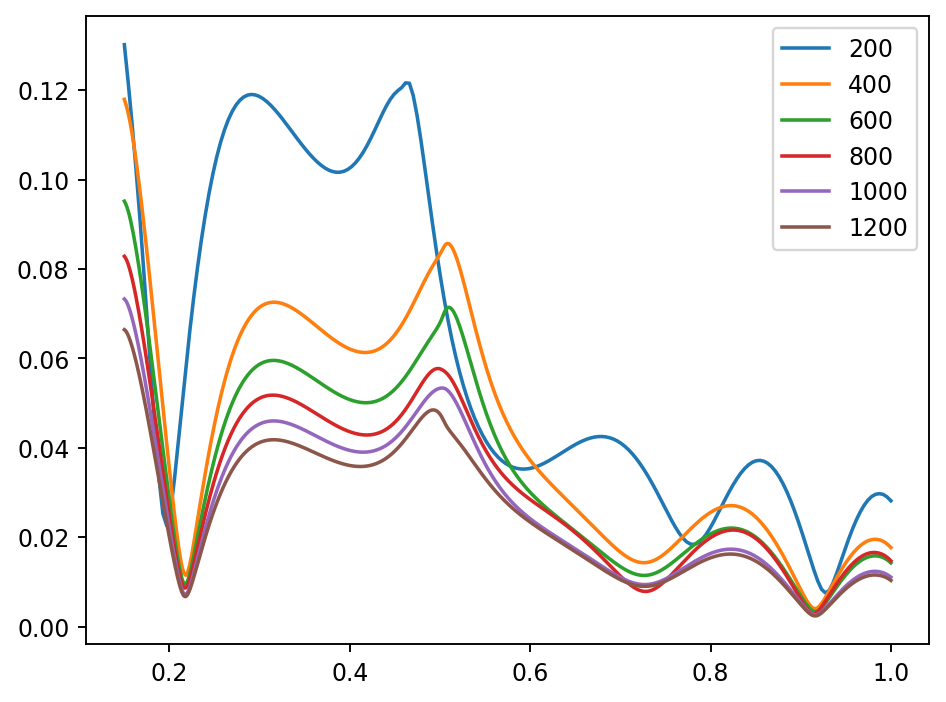

In [7]:
for nx in nx_l:
    extention = profile+"_"+str(nx)+"_"+str(int(rin*100))+"_"+str(int(rD*100))+"_"+spacing+"_"+str(m)+"_"+str(int(Mdisk_perc*100))+"_"+str(int(gammap*10))+"_"+str(b)
    print(extention)
    re,r       = grid(rin,rD,nx,spacing)
    
    sigma1_list = np.loadtxt("files/sigma1/"+extention+".txt")

    sigma1 = sigma1_list[:,0] + 1j*sigma1_list[:,1]
    
    plt.plot(r,np.abs(sigma1),label=str(nx))
    
plt.legend()

In [ ]:


rm = np.linspace(rin,rD,nx+1)
tm = np.linspace(-np.pi,np.pi,nx+1)

T ,R  = np.meshgrid(tm ,rm)
X ,Y  = R*np.cos(T)  , R*np.sin(T)

fsize  = 10
width  = 0.7
color  = "black"



In [52]:
def plot(Mdisk_perc_l,ms,bs):
    fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(4.8*3,4.8))
    ax = axes.flatten()

    l = 0
    for Mdisk_perc in Mdisk_perc_l:

        #print(Mdisk_perc)
        Md         = (Mdisk_perc*M)/(1.0-Mdisk_perc)
        #print(Md)

        for m in ms:
            #print(m)
            for b in bs:

                sigma1_txt = "sigma1"+"_m_"+str(m)+"_nx_"+str(nx)+"_"+"Mdisk"+"_"+str(Mdisk_perc)+"_"+"b"+"_"+str(b)

                sigma1_list = np.loadtxt("files/sigma1/"+sigma1_txt+".txt")

                sigma1 = sigma1_list[:,0] + 1j*sigma1_list[:,1]

                phi = np.linspace(-np.pi,np.pi,nx)

                eigen_matrix = np.zeros((nx,nx))
                for i in range(nx):
                    for j in range(nx):
                        eigen_matrix[i,j] = np.real(sigma1[i]*np.exp(-1.0j*m*phi[j]))

                im = ax[l].pcolormesh(X,Y,eigen_matrix,cmap="RdBu",
                   norm=colors.SymLogNorm(linthresh=np.abs(np.min(eigen_matrix))/2, 
                                                           linscale=1.0,
                                                           vmin=np.min(eigen_matrix), 
                                                           vmax=np.max(eigen_matrix)))

                ax[l].xaxis.set_minor_locator(tck.AutoMinorLocator(4))          #Agrega 2 ticks pequenos entre los ticks eje x
                ax[l].yaxis.set_minor_locator(tck.AutoMinorLocator(4))          #Agrega 2 ticks pequenos entre los ticks eje y

                ax[l].tick_params(axis="both",which="major",direction="in",length=5.0,width=width,labelsize=fsize,color=color,
                                 right=True,top=True)
                ax[l].tick_params(axis="both",which="minor",direction="in",length=3.0,width=width,labelsize=fsize,color=color,
                                 right=True,top=True) 

                ax[l].set_box_aspect(1)
                ax[l].set_title(r"$b =$"+str(b)+"   "+r"$m=$"+str(m)+"   "+r"$M_d=$"+str(Mdisk_perc))

            l += 1



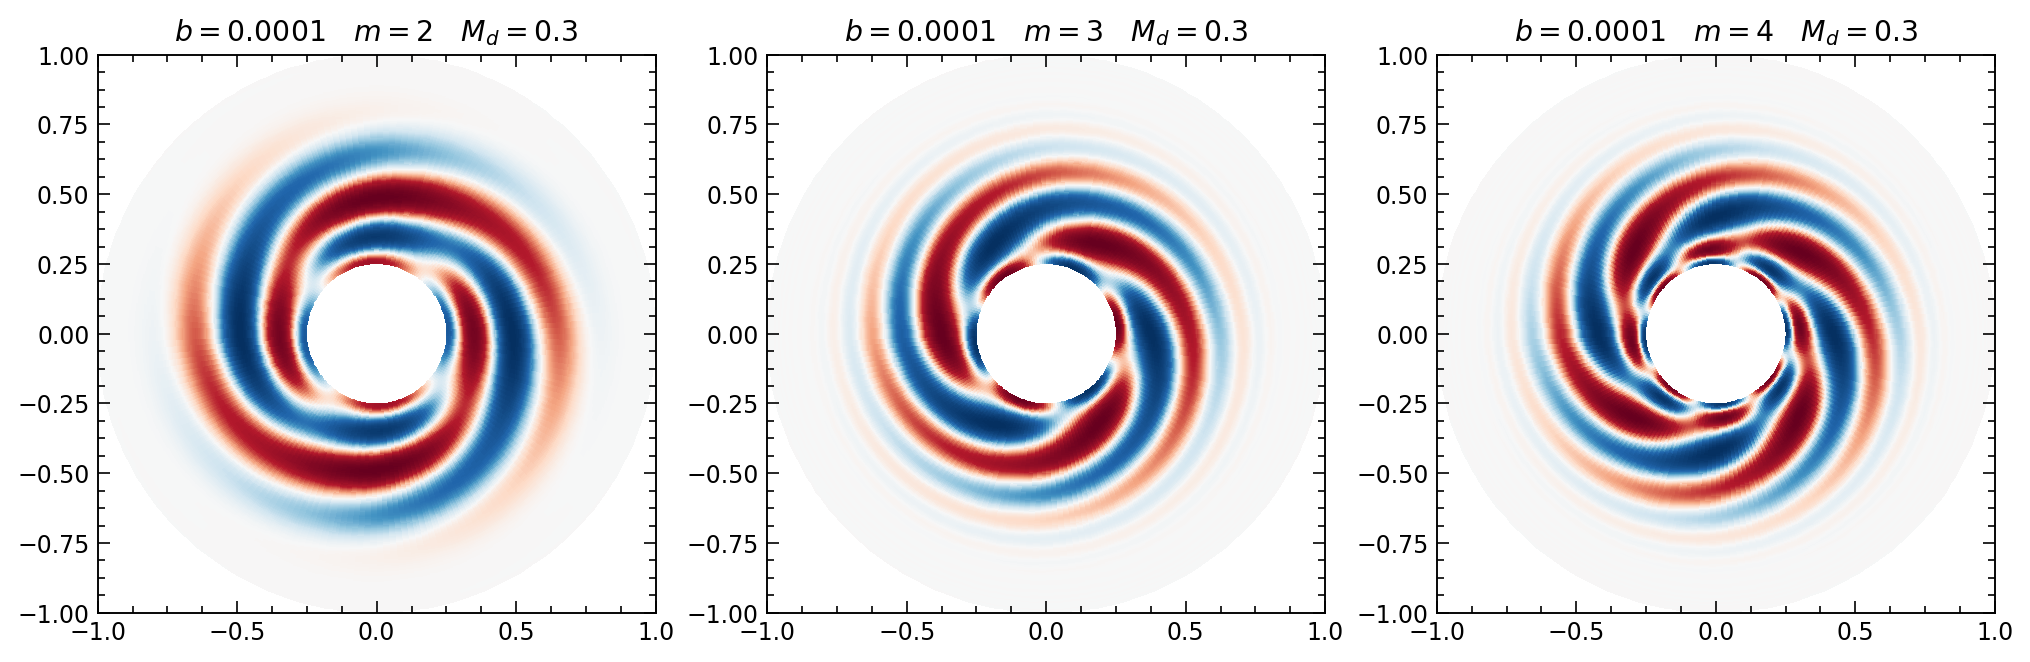

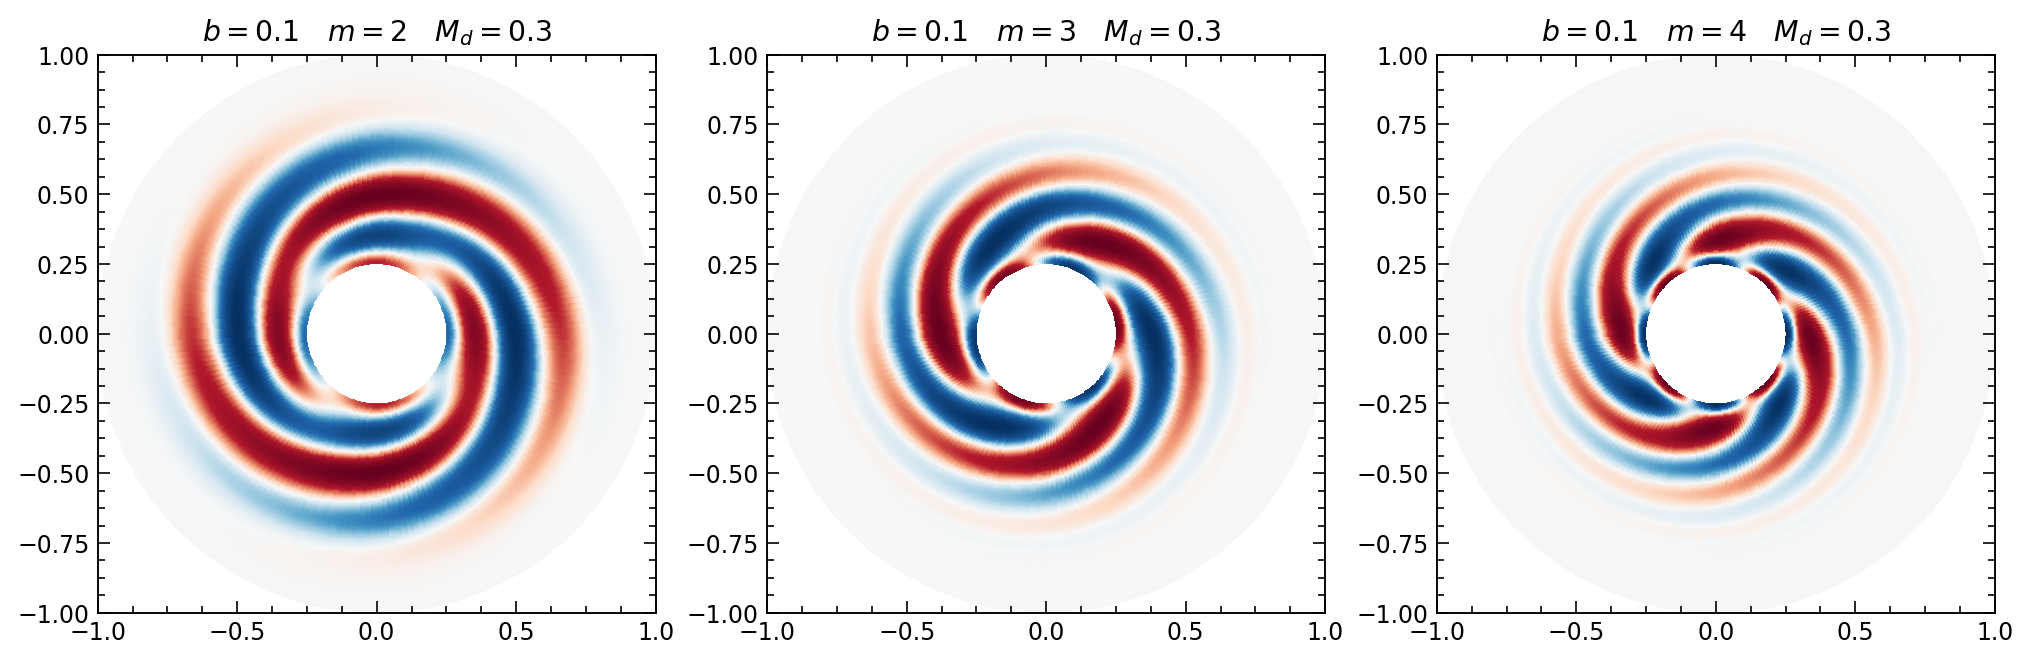

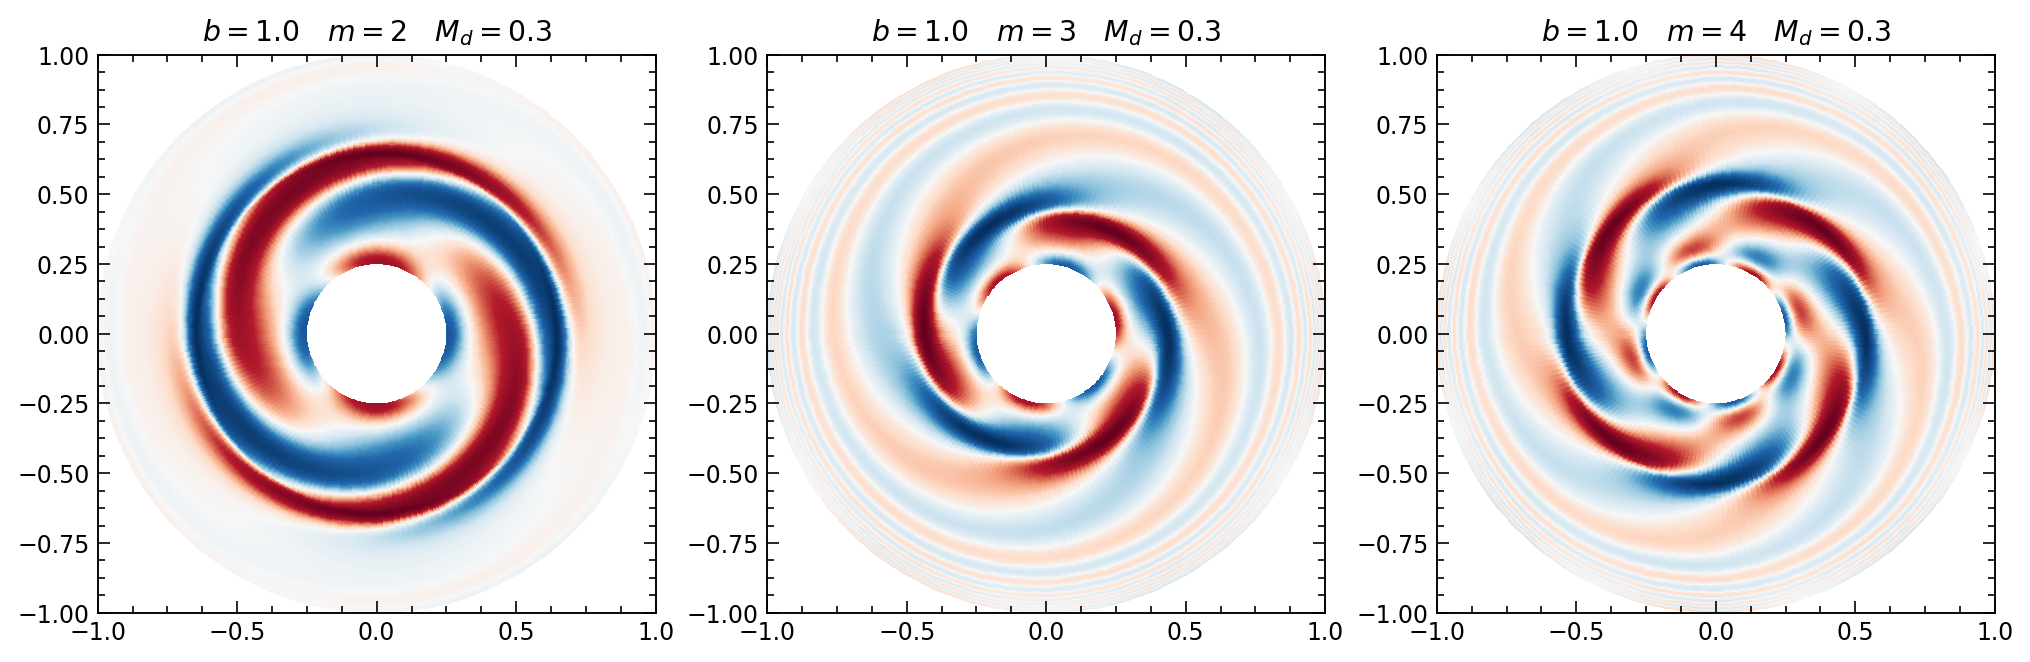

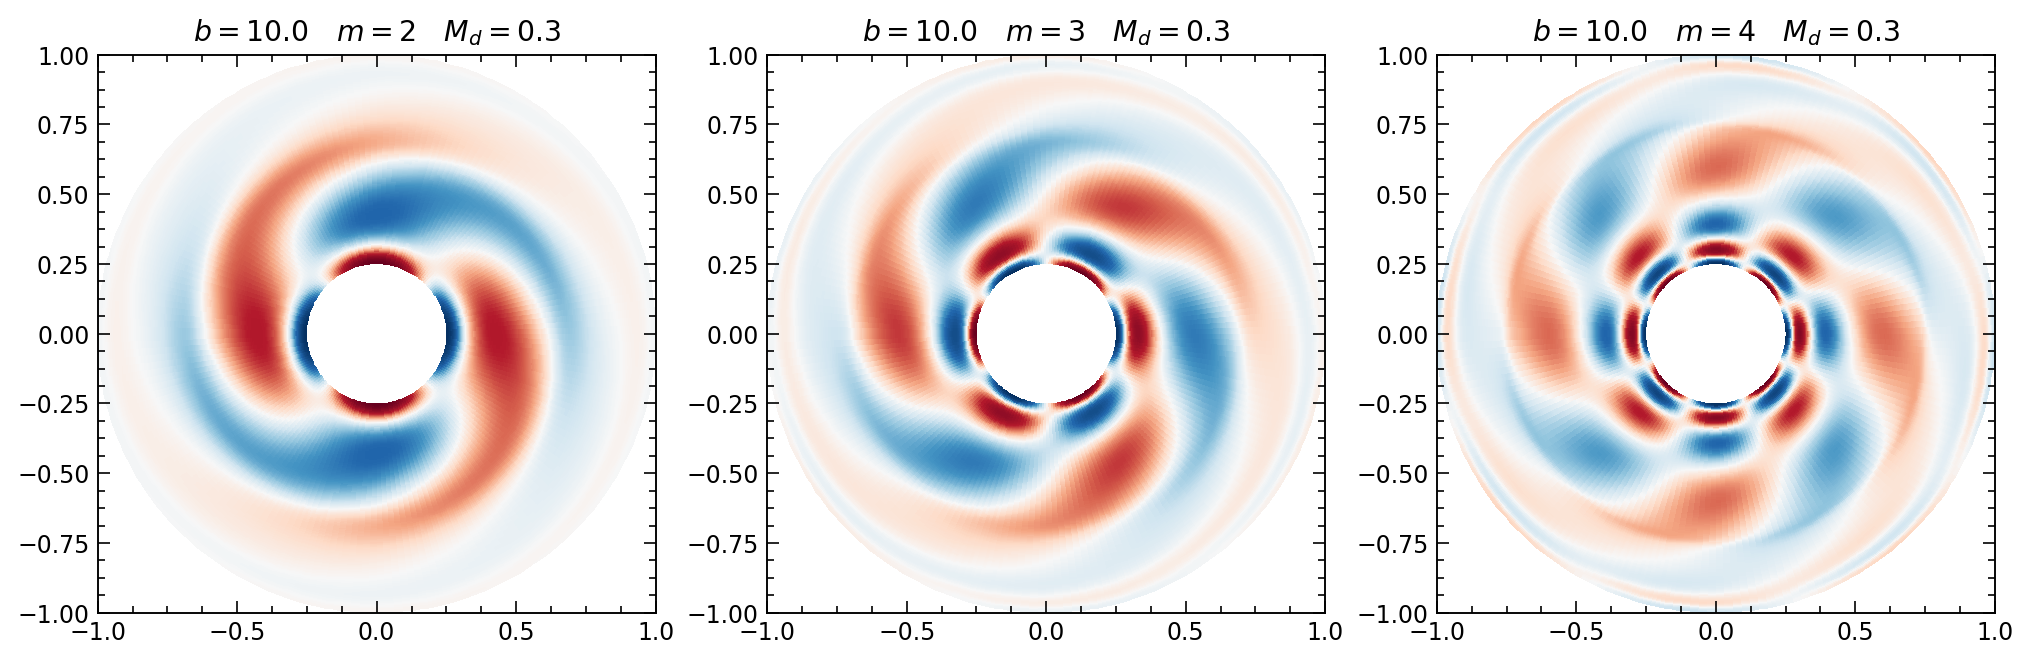

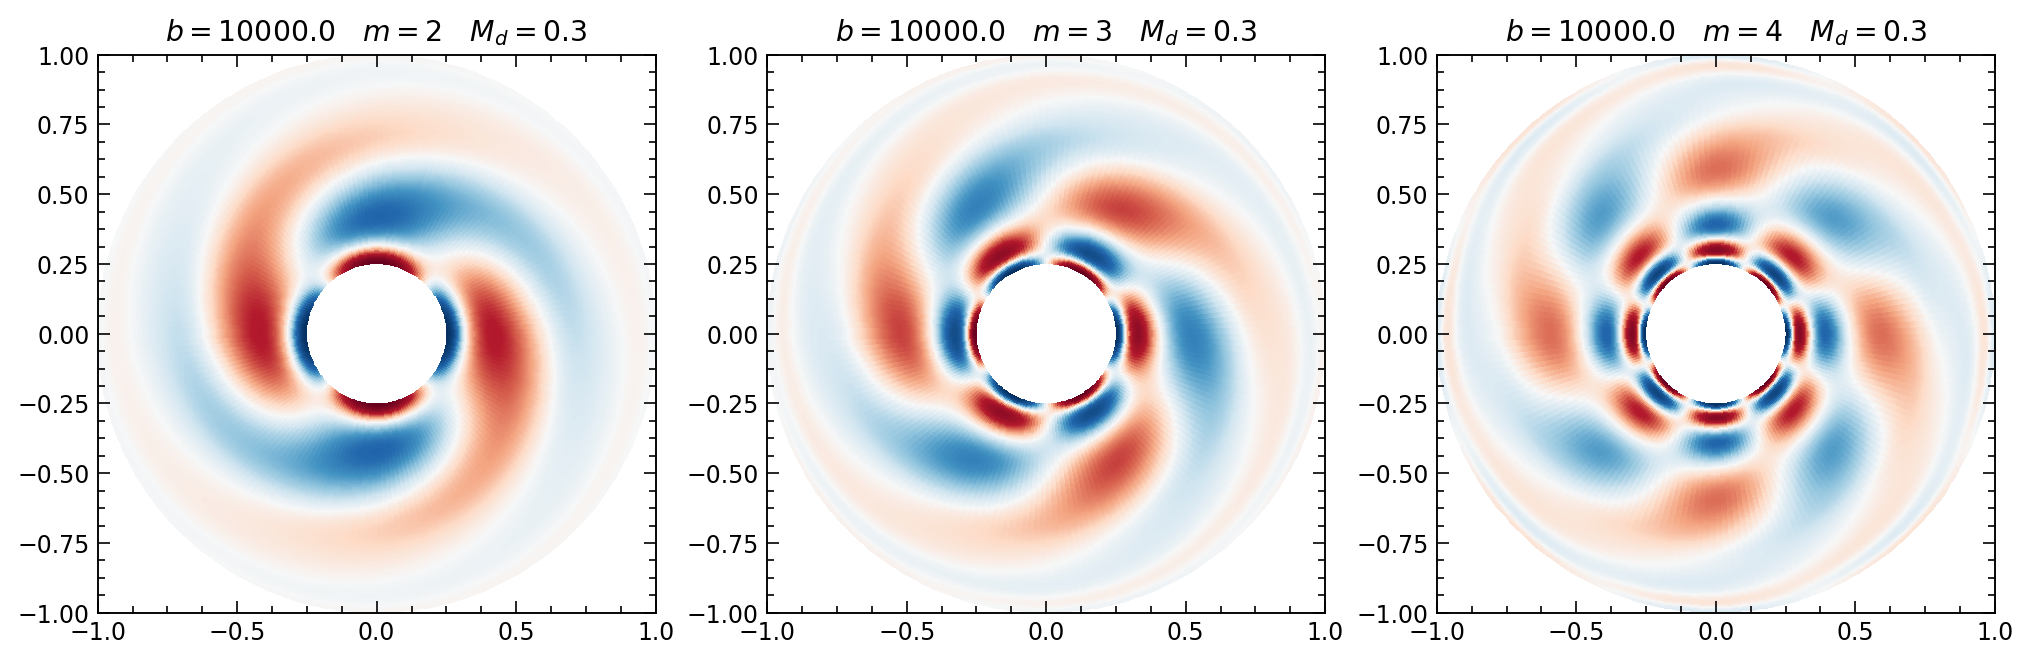

In [55]:
plot([0.3], [2,3,4],[1e-4])
plot([0.3], [2,3,4],[1e-1])
plot([0.3], [2,3,4],[1e0])
plot([0.3], [2,3,4],[1e1])
plot([0.3], [2,3,4],[1e4])